In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Context: Load the dataset

file_path = r"D:\ML\Projects-20240722T093004Z-001\Projects\vehicle_price_prediction\Vehicle Price Prediction\dataset.csv"
vehical_data = pd.read_csv(file_path)   
vehical_data.head() 

df = pd.DataFrame(vehical_data)


In [4]:
df.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [5]:
# Create 'age' feature
df['age'] = 2025 - df['year']

In [6]:
df.sample(5)

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,age
738,2024 Mazda CX-90 PHEV Preferred,"\n \n At Walser, youll get an exce...",Mazda,CX-90 PHEV,2024,50955.0,DOHC 16V LEV3-SULEV30,4.0,PHEV Hybrid Fuel,0.0,Automatic,Preferred,SUV,4.0,Machine,Black,All-wheel Drive,1
736,2024 Hyundai Tucson Hybrid N Line,Titan Gray 2024 Hyundai Tucson Hybrid N Line A...,Hyundai,Tucson Hybrid,2024,36600.0,"ream 1.6L I-4 gasoline direct injection, DOHC,...",4.0,Hybrid,10.0,Automatic,N Line,SUV,4.0,Titan Gray,Black w/Red Accents,All-wheel Drive,1
823,2024 Hyundai Santa Cruz 2.5T NIGHT,\n \n Hampton Gray 2024 Hyundai Sa...,Hyundai,Santa Cruz,2024,40375.0,16V PDI DOHC Turbo,4.0,Gasoline,1.0,8-Speed Automatic with Auto-Shift,2.5T NIGHT,Pickup Truck,4.0,Hampton Gray,Black,All-wheel Drive,1
750,2023 Dodge Durango Pursuit,2023 Dodge Durango AWD Pursuit DB Black Crysta...,Dodge,Durango,2023,47785.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,DB Black Crystal Clearcoat,Black,All-wheel Drive,2
147,2024 Dodge Hornet Hornet Gt Awd,Come see how our family can make the differenc...,Dodge,Hornet,2024,35480.0,"ne 2L I-4 gasoline direct injection, DOHC, var...",4.0,Gasoline,0.0,Automatic,Hornet Gt Awd,SUV,4.0,Hot Tamale,Black,All-wheel Drive,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
 17  age             1002 non-null   i

In [8]:
df.isnull().sum().sort_values(ascending=False)

cylinders         105
description        56
interior_color     38
mileage            34
price              23
doors               7
fuel                7
exterior_color      5
body                3
transmission        2
engine              2
trim                1
name                0
year                0
model               0
make                0
drivetrain          0
age                 0
dtype: int64

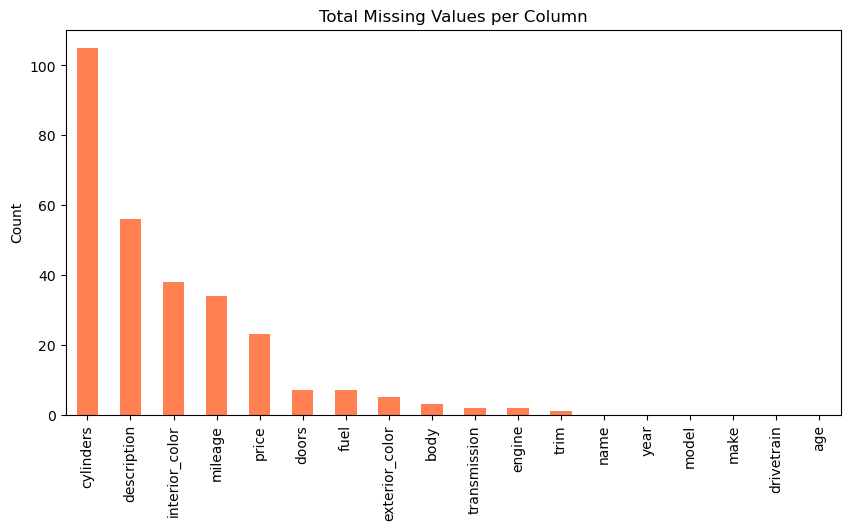

In [9]:
df.isnull().sum().sort_values(ascending=False).plot(
    kind='bar', figsize=(10, 5), color='coral'
)
plt.title('Total Missing Values per Column')
plt.ylabel('Count')
plt.show()

In [10]:
df.columns

Index(['name', 'description', 'make', 'model', 'year', 'price', 'engine',
       'cylinders', 'fuel', 'mileage', 'transmission', 'trim', 'body', 'doors',
       'exterior_color', 'interior_color', 'drivetrain', 'age'],
      dtype='object')

In [11]:
df.shape

(1002, 18)

In [12]:
numerical = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = df.select_dtypes(include=['object', 'category']).columns.tolist()

numerical

['year', 'price', 'cylinders', 'mileage', 'doors', 'age']

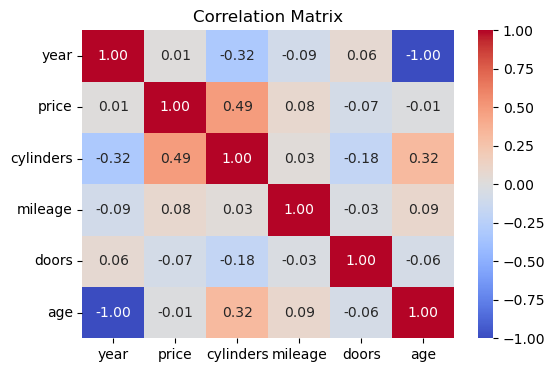

In [13]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

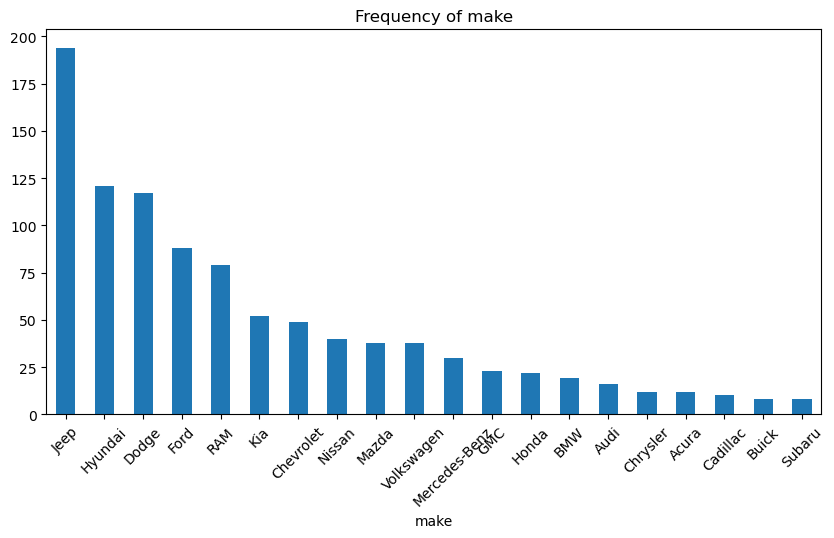

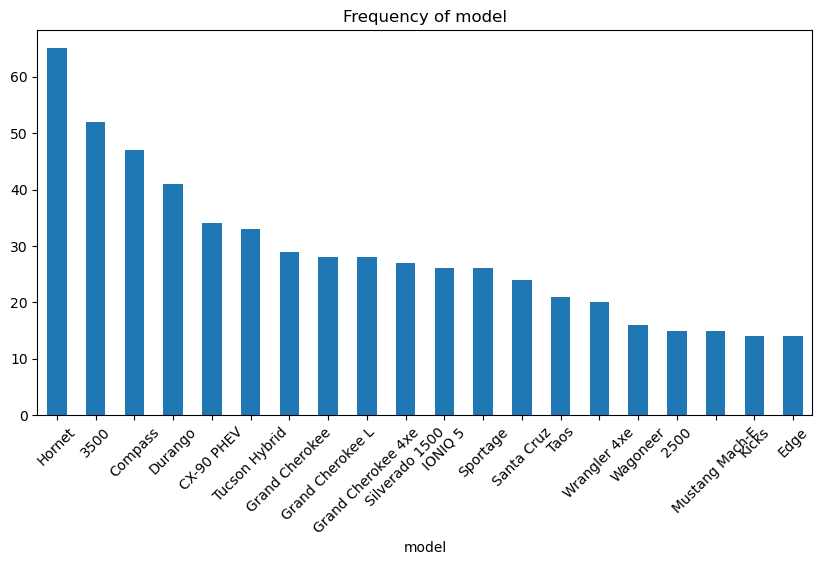

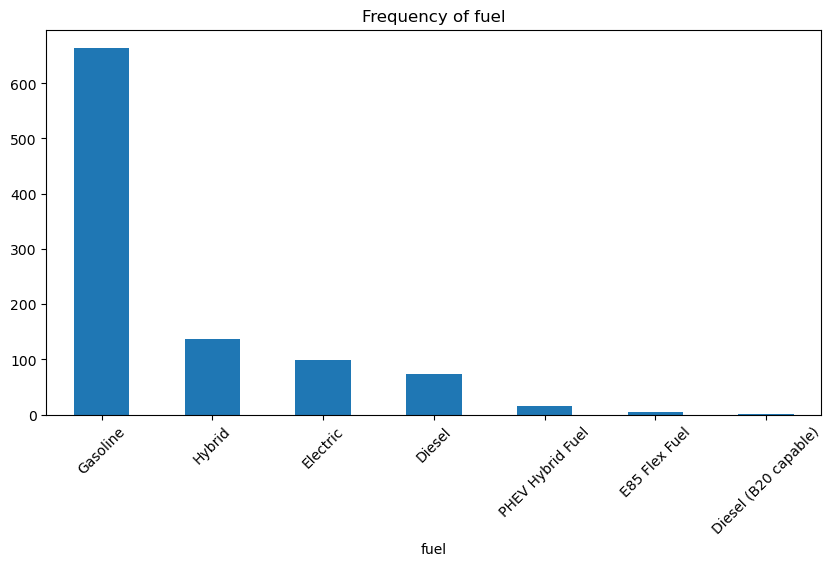

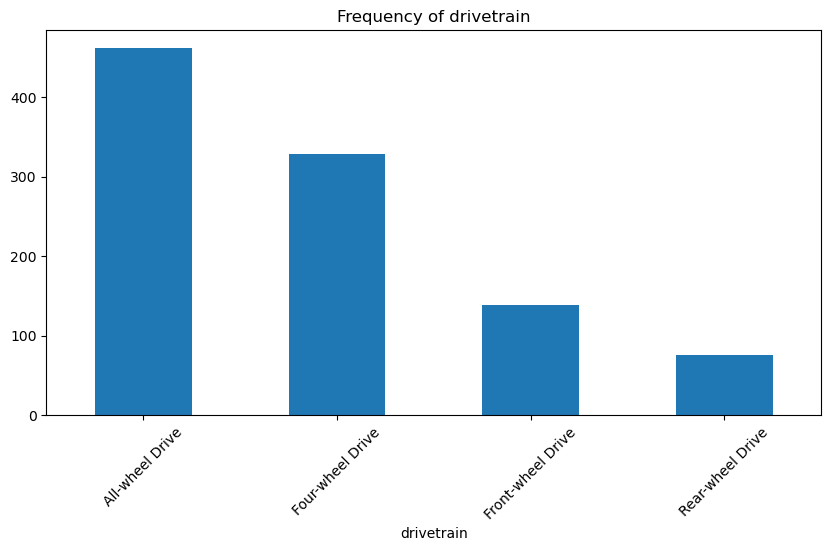

In [14]:
categorical = ['make', 'model', 'fuel', 'drivetrain']
for col in categorical:
    plt.figure(figsize=(10, 5))
    df[col].value_counts().head(20).plot(kind='bar')
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [15]:
# Separate features and target
X = df.drop('price', axis=1)
y = df['price']

X.shape, y.shape


((1002, 17), (1002,))

In [16]:
y.isnull().sum()

np.int64(23)

In [17]:
# Impute missing values in target column
target_imputer = SimpleImputer(strategy='mean')
y = target_imputer.fit_transform(y.values.reshape(-1, 1)).ravel()


In [18]:
print("Missing values in y:", np.isnan(y).sum())  # Should be 0

Missing values in y: 0


In [19]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols

['year', 'cylinders', 'mileage', 'doors', 'age']

In [20]:
categorical_cols

['name',
 'description',
 'make',
 'model',
 'engine',
 'fuel',
 'transmission',
 'trim',
 'body',
 'exterior_color',
 'interior_color',
 'drivetrain']

In [21]:
df[categorical_cols].head()

,name,description,make,model,engine,fuel,transmission,trim,body,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,24V GDI DOHC Twin Turbo,Gasoline,8-Speed Automatic,Series II,SUV,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,OHV,Gasoline,8-Speed Automatic,Laredo,SUV,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,"6.2L V-8 gasoline direct injection, variable v...",Gasoline,Automatic,Denali,SUV,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,16V MPFI OHV,Gasoline,8-Speed Automatic,Pursuit,SUV,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,24V DDI OHV Turbo Diesel,Diesel,6-Speed Automatic,Laramie,Pickup Truck,Silver,Black,Four-wheel Drive


In [22]:
df[categorical_cols].isnull().sum().sort_values(ascending=False)


description       56
interior_color    38
fuel               7
exterior_color     5
body               3
engine             2
transmission       2
trim               1
model              0
make               0
name               0
drivetrain         0
dtype: int64

In [23]:
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

In [24]:
df[categorical_cols].sample(3)

,name,description,make,model,engine,fuel,transmission,trim,body,exterior_color,interior_color,drivetrain
554,2024 Ford Mustang Mach-E Premium,2024 Ford Mustang Mach-E Premium 300A 105/91 C...,Ford,Mustang Mach-E,c,Electric,1-Speed Automatic,Premium,SUV,Glacier Gray,Black,All-wheel Drive
135,2024 Chrysler Pacifica Hybrid Select,Buy with confidence knowing Voyles Chrysler Do...,Chrysler,Pacifica Hybrid,24V MPFI DOHC Hybrid,Hybrid,Automatic CVT,Select,Passenger Van,Bright White Clearcoat,Black,Front-wheel Drive
210,2024 Ford Mustang Mach-E Premium,\n \n .\n \n,Ford,Mustang Mach-E,c,Electric,1-Speed Automatic,Premium,SUV,Shadow Black,Black Onyx,All-wheel Drive


In [25]:
df[categorical_cols].isnull().sum().sort_values(ascending=False)


name              0
description       0
make              0
model             0
engine            0
fuel              0
transmission      0
trim              0
body              0
exterior_color    0
interior_color    0
drivetrain        0
dtype: int64

In [26]:
df[numerical_cols].head()

,year,cylinders,mileage,doors,age
0,2024,6.0,10.0,4.0,1
1,2024,6.0,1.0,4.0,1
2,2024,8.0,0.0,4.0,1
3,2023,8.0,32.0,4.0,2
4,2024,6.0,10.0,4.0,1


In [27]:
df[numerical_cols].isnull().sum().sort_values(ascending=False)

cylinders    105
mileage       34
doors          7
year           0
age            0
dtype: int64

In [28]:
# Handling missing values
df['mileage'].fillna(df['mileage'].median(), inplace=True)
df['cylinders'].fillna(df['cylinders'].median(), inplace=True)
df['doors'].fillna(df['doors'].mode()[0], inplace=True)


In [29]:
df[numerical_cols].isnull().sum().sort_values(ascending=False)

year         0
cylinders    0
mileage      0
doors        0
age          0
dtype: int64

In [30]:
# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [31]:
categorical_transformer

Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='Unknown', strategy='constant')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [32]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['year', 'cylinders', 'mileage', 'doors',
                                  'age']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['name', 'description', 'make', 'model', 'engine', 'fuel',
       'transmission', 'trim', 'body', 'exterior_color', 'interior_color',
       'drivetrain'],
      dtype='object'))])

In [33]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
def evaluate_regression_model(y_test, y_preds, model_name="Model"):
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    mae = mean_absolute_error(y_test, y_preds)
    r2 = r2_score(y_test, y_preds)

    print(f"Evaluation Metrics for {model_name}:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE : {mae:.4f}")
    print(f"R_score  : {r2:.4f}")

    return{
        "Model": model_name,
        "RMSE": rmse,
        "MAE": mae,
        "R_score": r2
        }

In [35]:
# Linear Regression
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', LinearRegression())])
lr_pipeline.fit(X_train, y_train)
y_preds = lr_pipeline.predict(X_test)

lr_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'cylinders',
                                                   'mileage', 'doors', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['name', 'description', 'make', 'model', 'engine', 'fuel',
       'transmission', 'trim', 'body', 'exterior_color', 'interior_color',
       'drivetrain'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [36]:
LinearRegression_metrics = evaluate_regression_model(y_test, y_preds, model_name="LinearRegression")

Evaluation Metrics for LinearRegression:
RMSE: 11548.6957
MAE : 5278.8487
R_score  : 0.4768


In [37]:
# Decision Tree Regressor
dtr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', DecisionTreeRegressor(random_state=42))])
dtr_pipeline.fit(X_train, y_train)
dtr_preds = dtr_pipeline.predict(X_test)

dtr_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'cylinders',
                                                   'mileage', 'doors', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['name', 'description', 'make', 'model', 'engine', 'fuel',
       'transmission', 'trim', 'body', 'exterior_color', 'interior_color',
       'drivetrain'],
      dtype='object'))])),
                ('model', DecisionTreeRegressor(random_state=42))])

In [38]:
DecisionTreeRegressor_metrics = evaluate_regression_model(y_test, dtr_preds, model_name="DecisionTreeRegressor")

Evaluation Metrics for DecisionTreeRegressor:
RMSE: 7648.7999
MAE : 4202.2122
R_score  : 0.7705


In [39]:
# Random Forest
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestRegressor(random_state=42))])
rf_pipeline.fit(X_train, y_train)
rf_preds = rf_pipeline.predict(X_test)
rf_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'cylinders',
                                                   'mileage', 'doors', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['name', 'description', 'make', 'model', 'engine', 'fuel',
       'transmission', 'trim', 'body', 'exterior_color', 'interior_color',
       'drivetrain'],
      dtype='object'))])),
                ('model', RandomForestRegressor(random_state=42))])

In [40]:
RandomForestRegressor_metrics = evaluate_regression_model(y_test, rf_preds, model_name="RandomForestRegressor")

Evaluation Metrics for RandomForestRegressor:
RMSE: 6883.8656
MAE : 3959.5955
R_score  : 0.8141


In [52]:
from sklearn.linear_model import RidgeCV

# Ridge CV
rdcv_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RidgeCV(alphas=(0.1, 1.0, 10.)))])
rdcv_pipeline.fit(X_train, y_train)
rdcv_preds = rdcv_pipeline.predict(X_test)
rdcv_pipeline


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'cylinders',
                                                   'mileage', 'doors', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['name', 'description', 'make', 'model', 'engine', 'fuel',
       'transmission', 'trim', 'body', 'exterior_color', 'interior_color',
       'drivetrain'],
      dtype='object'))])),
                ('model', RidgeCV())])

In [42]:
RidgeCV_metrics = evaluate_regression_model(y_test, rdcv_preds, model_name="RidgeCV")

Evaluation Metrics for RidgeCV:
RMSE: 5389.5802
MAE : 3682.8911
R_score  : 0.8861


In [43]:
!pip install xgboost


In [53]:
from xgboost import XGBRegressor

# XGBoost Regressor
XGB_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', XGBRegressor(n_estimators = 500))])
XGB_pipeline.fit(X_train, y_train)
XGB_preds = XGB_pipeline.predict(X_test)
XGB_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'cylinders',
                                                   'mileage', 'doors', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))])...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=500, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [45]:
XGBRegressor_metrics = evaluate_regression_model(y_test, XGB_preds, model_name="XGBRegressor")

Evaluation Metrics for XGBRegressor:
RMSE: 5598.3928
MAE : 3570.4788
R_score  : 0.8771


In [54]:
# results for all models
results = pd.DataFrame([LinearRegression_metrics,DecisionTreeRegressor_metrics,RandomForestRegressor_metrics,XGBRegressor_metrics,RidgeCV_metrics])
# Convert to DataFrame
results_df = pd.DataFrame(results)
display(results_df)


,Model,RMSE,MAE,R_score
0,LinearRegression,11548.695684,5278.848682,0.476838
1,DecisionTreeRegressor,7648.799864,4202.212201,0.770514
2,RandomForestRegressor,6883.865627,3959.595488,0.814119
3,XGBRegressor,5598.392792,3570.478804,0.877059
4,RidgeCV,5389.580200,3682.891059,0.886059


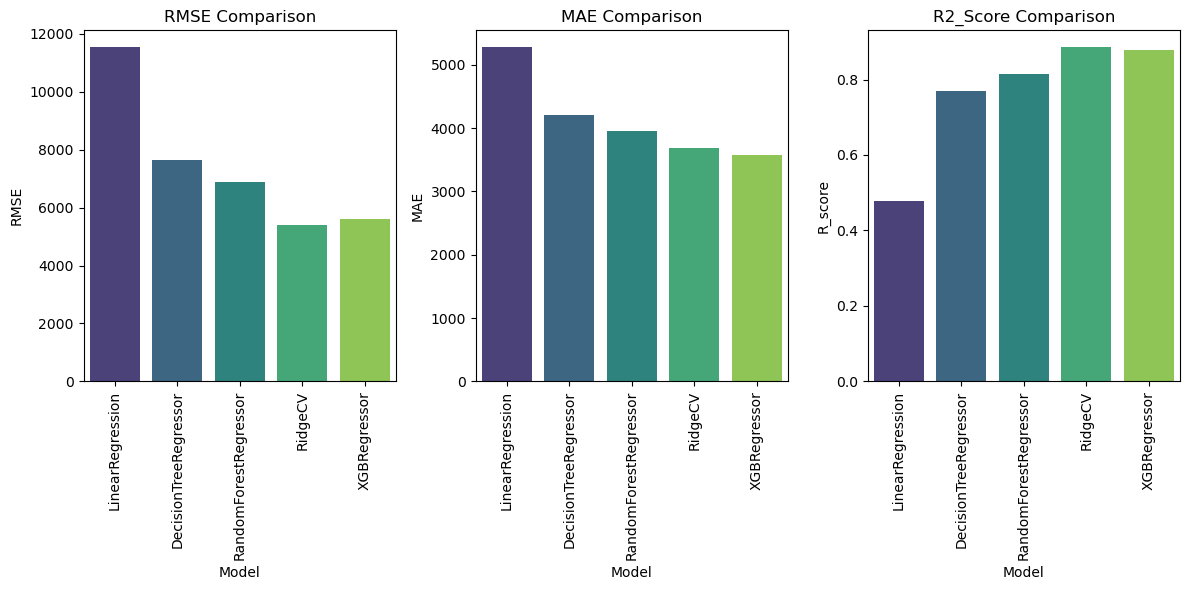

In [47]:
plt.figure(figsize=(12, 6))
# RMSE Comparison
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='RMSE', data=results_df, palette='viridis')
plt.title('RMSE Comparison')
plt.xticks(rotation=90)

# MAE Comparison
plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='MAE', data=results_df, palette='viridis')
plt.title('MAE Comparison')
plt.xticks(rotation=90)

# R² Comparison
plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='R_score', data=results_df, palette='viridis')
plt.title('R2_Score Comparison')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

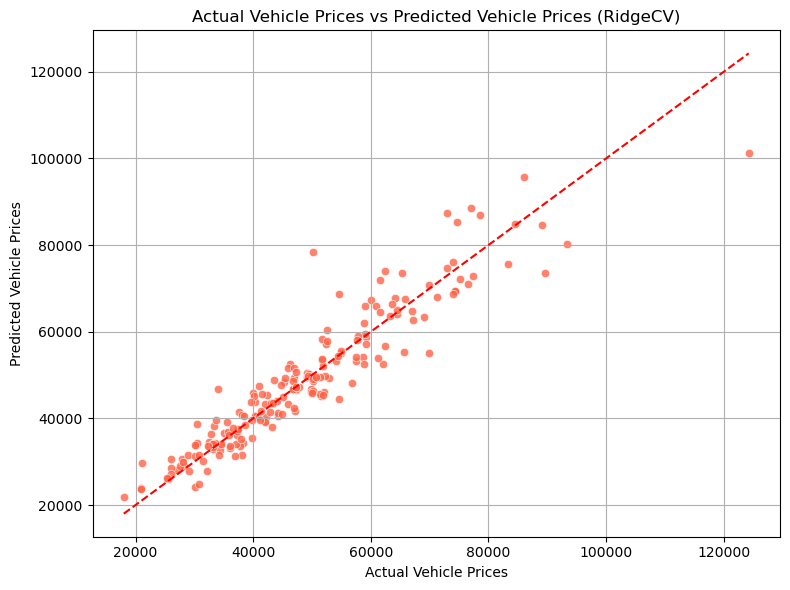

In [71]:
best_model = results_df.loc[results_df['R_score'].idxmax()]['Model']

if best_model == 'RidgeCV':
    preds = rdcv_preds
elif best_model == 'XGBRegressor':
    preds = XGB_preds

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=preds, alpha=0.8, color='tomato')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Vehicle Prices')
plt.ylabel('Predicted Vehicle Prices')
plt.title(f'Actual Vehicle Prices vs Predicted Vehicle Prices ({best_model})')
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
# Save the best model using joblib
from joblib import dump, load
dump(rdcv_pipeline, 'ridgecv_pipeline.joblib')
model = load('ridgecv_pipeline.joblib')

In [50]:
loaded_model = load('ridgecv_pipeline.joblib')
sample_preds = loaded_model.predict(X_test)

In [51]:
Loded_model_metrics = evaluate_regression_model(y_test, sample_preds, model_name="RidgeCV_loaded_model ")

Evaluation Metrics for RidgeCV_loaded_model :
RMSE: 5389.5802
MAE : 3682.8911
R_score  : 0.8861


In [ ]:
# Convert to a DataFrame for comparison

comparison_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': sample_preds
})

# View top 10 rows
print(comparison_df.head(10))


   Actual Price  Predicted Price
0       33255.0     38288.249296
1       40434.0     40606.938336
2       40375.0     40463.358031
3       54949.0     55046.683353
4       57508.0     53186.272299
5       54641.0     44427.563029
6       49885.0     46751.167683
7       49180.0     49492.766573
8       74366.0     69319.290611
9       38575.0     38562.755508


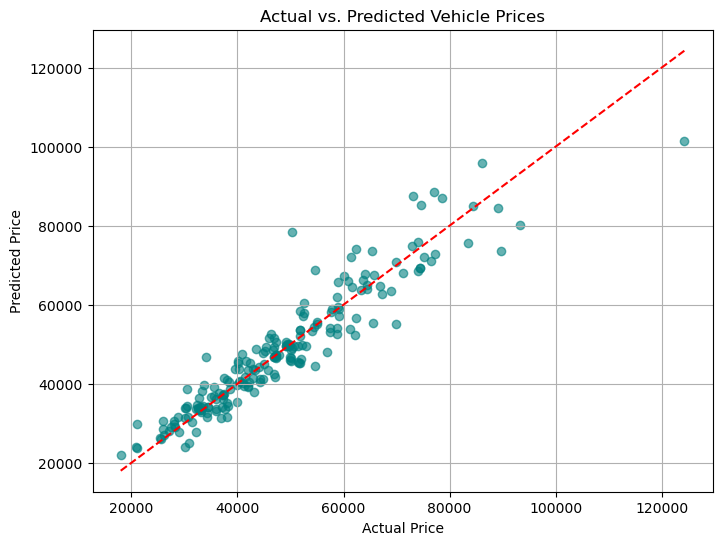

In [73]:
# Show actual vs. predicted for a few prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, sample_preds, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Vehicle Prices')
plt.grid(True)
plt.show()


In [75]:
# Show actual vs. predicted for a few prices
for i in range(5):
    print(f"Actual: {y_test[i]:,.2f} | Predicted: {sample_preds[i]:,.2f}")


Actual: 33,255.00 | Predicted: 38,288.25
Actual: 40,434.00 | Predicted: 40,606.94
Actual: 40,375.00 | Predicted: 40,463.36
Actual: 54,949.00 | Predicted: 55,046.68
Actual: 57,508.00 | Predicted: 53,186.27
